In [1]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt
from scipy.optimize import minimize

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

Here's a function:

In [2]:
def A(x):
    d1 = x[0]
    d2 = x[1]
    return d1*d2


def P(x):
    d1 = x[0]
    d2 = x[1]
    return 2*(d1+d2)


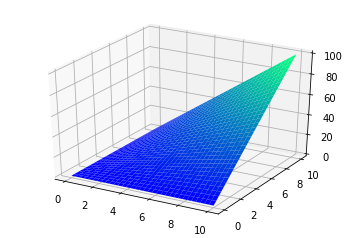

In [3]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[0:10:100j,0:10:100j]
AMesh = A(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, AMesh, cmap=pt.cm.winter, rstride=3, cstride=3)

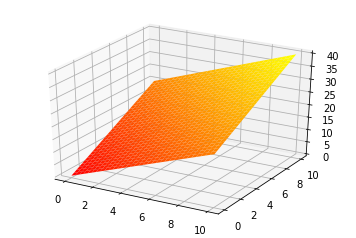

In [5]:
fig2 = pt.figure()
ax = fig2.gca(projection="3d")

PMesh = P(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, PMesh,  cmap=pt.cm.autumn, rstride=3, cstride=3)

In [ ]:
pt.axis("equal")
pt.grid()
figc1 = pt.contour(xmesh, ymesh, AMesh, 20, cmap=pt.cm.winter)
figc2 = pt.contour(xmesh, ymesh, PMesh, 10, colors='k')
pt.clabel(figc2, inline=1, fontsize=12)

# Constrained Optimization Problem
max A

st  P <= 20

or to use with minimize

min f = -A

st g = 20 - P >= 0

In [10]:
#Initial guess

x0 = np.array([9,1])
f = lambda x: -A(x) 
g = lambda x: 20 - P(x)
minimize(f, x0, constraints=({'type': 'ineq', 'fun': lambda x: g(x)}))


     fun: -24.999999999999815
     jac: array([-4.99999976, -4.99999976])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ 5.,  5.])